<a href="https://colab.research.google.com/github/fatemeh-ict/NLp/blob/main/TextClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
df=pd.read_csv('/content/archive(1).zip')

In [3]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.shape

(5572, 2)

In [11]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

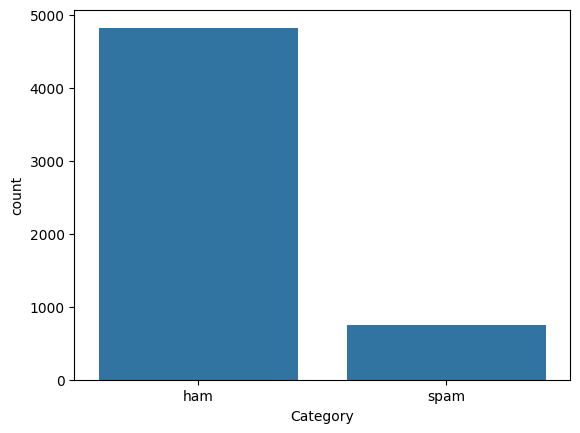

In [12]:
#visualization
sns.countplot(x=df['Category'])
plt.show

In [16]:
x=df['Message']
y=df['Category']

In [17]:
#preprocesssing
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [19]:
y.shape,y[2]

((5572,), 1)

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [21]:
x_train.shape,y_train.shape

((4457,), (4457,))

In [22]:
x_test.shape,y_test.shape

((1115,), (1115,))

In [26]:
#tokenize and vectorized
from tensorflow.keras.preprocessing.text import Tokenizer

max_word=500
tkn=Tokenizer(num_words=max_word)
tkn.fit_on_texts(x_train)
seq=tkn.texts_to_sequences(x_train)


In [27]:
seq

[[13, 352, 12, 388, 225, 1, 17, 481, 482],
 [232, 217, 3, 16, 4, 105, 245, 12, 3, 95, 17, 22, 2],
 [82, 1, 208, 72, 144, 86, 3, 9],
 [38, 74, 193, 83, 2, 78],
 [98, 3, 36, 2, 249, 56, 2, 54, 33, 3, 218, 34, 5, 93, 53, 34, 137, 26, 37],
 [57, 325, 52, 96, 262],
 [50, 282, 50, 9, 94, 54, 33, 499, 9, 69, 23, 318, 46, 30, 164],
 [48, 341],
 [46,
  6,
  6,
  282,
  282,
  483,
  23,
  1,
  6,
  83,
  2,
  97,
  4,
  287,
  1,
  71,
  111,
  363,
  25,
  30,
  111,
  43,
  27,
  44,
  81],
 [170, 4, 33, 6, 54, 263, 9, 119, 73, 2, 305, 240],
 [364, 38, 29, 176, 203, 12, 51],
 [143,
  30,
  117,
  9,
  117,
  297,
  298,
  144,
  143,
  194,
  6,
  117,
  283,
  39,
  120,
  185,
  298,
  28],
 [13, 8, 12, 71, 92, 2, 232],
 [90, 90, 177, 219, 3, 58, 113, 7, 288],
 [37, 292, 46, 21, 3, 164],
 [90, 58, 2, 47, 254, 282],
 [1, 40, 41],
 [293, 263, 289, 29, 3, 342, 97, 5, 289, 8],
 [161, 389, 10, 86, 45, 6, 21, 10, 94, 484, 220, 70, 2, 6],
 [24, 19, 211, 294, 153, 9, 145, 44, 10],
 [1, 2, 162, 74, 

In [28]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_len=100
padded_docs=pad_sequences(seq,padding='pre',maxlen=max_len)

In [30]:
padded_docs.shape

(4457, 100)

In [31]:
from tensorflow.keras.models import Sequential
from keras.layers import LSTM,Activation,Dense,Dropout,Input,Embedding
embeding_vector_features=30
model=Sequential()
model.add(Embedding(max_word,embeding_vector_features,input_length=max_len))
model.add(LSTM(256))
model.add(Dense(1,activation='sigmoid'))


In [32]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 30)           15000     
                                                                 
 lstm (LSTM)                 (None, 256)               293888    
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 309145 (1.18 MB)
Trainable params: 309145 (1.18 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
model.fit(padded_docs,y_train,batch_size=128,epochs=10,validation_split=.2)

Epoch 1/10
28/28 [==============================] - 40s 1s/step - loss: 0.4365 - accuracy: 0.8648 - val_loss: 0.3409 - val_accuracy: 0.8666
Epoch 2/10
28/28 [==============================] - 24s 857ms/step - loss: 0.2609 - accuracy: 0.9116 - val_loss: 0.1526 - val_accuracy: 0.9619
Epoch 3/10
28/28 [==============================] - 25s 894ms/step - loss: 0.1161 - accuracy: 0.9630 - val_loss: 0.0814 - val_accuracy: 0.9776
Epoch 4/10
28/28 [==============================] - 25s 890ms/step - loss: 0.0596 - accuracy: 0.9823 - val_loss: 0.0728 - val_accuracy: 0.9798
Epoch 5/10
28/28 [==============================] - 26s 918ms/step - loss: 0.0463 - accuracy: 0.9851 - val_loss: 0.0736 - val_accuracy: 0.9798
Epoch 6/10
28/28 [==============================] - 24s 845ms/step - loss: 0.0380 - accuracy: 0.9888 - val_loss: 0.0759 - val_accuracy: 0.9809
Epoch 7/10
28/28 [==============================] - 24s 858ms/step - loss: 0.0359 - accuracy: 0.9896 - val_loss: 0.0700 - val_accuracy: 0.9832
Ep

In [35]:
text_seq=tkn.texts_to_sequences(x_test)

In [37]:
test_padded=pad_sequences(text_seq,maxlen=max_len)

In [41]:
accr=model.evaluate(test_padded,y_test)

35/35 [==============================] - 5s 130ms/step - loss: 0.0734 - accuracy: 0.9830


In [42]:
accr

[0.07342401891946793, 0.9829596281051636]